In [76]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
sys.path.append("/Volumes/Lab/Users/bhofflic/cell_classification/src")
import istarmap
from tqdm import tqdm
import features_correlations as feat_c
import features_visual as feat_v

sys.path.append("/Volumes/Lab/Users/scooler/classification/")
import cell_display_lib as cdl
import features
import multiprocessing as mp
from multiprocessing import Pool


import elephant, warnings
import quantities as pq
from elephant.conversion import BinnedSpikeTrain
from neo import SpikeTrain

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [150]:
piece_ids = ["2018-02-09-7"]

ct = cdl.CellTable()
for piece_id in piece_ids:
    print(piece_id)
    ct.file_load_pieces(f'/Volumes/Scratch/Analysis/{piece_id}', [piece_id])
    label_data_path = f'/Volumes/Analysis/{piece_id}/data999/data999.verified_rb.classification.txt'
    # label_data_path = f'/Volumes/Analysis/{piece_id}/data999/data999.classification.txt'
    label_mode = 'list'

    ct.dataset_table.at[(piece_id, 'com'), 'label_data_path'] = label_data_path
    ct.dataset_table.at[(piece_id, 'com'), 'labels'] = label_mode
    
features_to_generate_by_dataset = [feat_v.Feature_rf_convex_hull,
                                   feat_v.Feature_rf_boundary,
                                   feat_c.Feature_rf_radii,
                                   feat_c.Feature_rf_overlaps,
                                   feat_c.Feature_cross_correlations_complete_fast,]

# indices = 'all'
indices = ct.unit_table.query(f"run_id == '001'").index
ct.generate_features(indices, features_to_generate_by_dataset, [],
                     force_features=1)

features_to_generate_by_dataset = [features.Feature_load_manual_labels]

# indices = 'all'
indices = ct.unit_table.query(f"run_id == 'com'").index
ct.generate_features(indices, features_to_generate_by_dataset, [],
                     force_features=1)
ct.copy_unit_labels_to_cells_combined()
ct.copy_cell_labels_to_units()

~ Welcome to the CellTable ~experience~
~ 
~ Starting a fresh new CellTable
2018-02-09-7
~ Loading 1 pieces from /Volumes/Scratch/Analysis/2018-02-09-7: /Volumes/Scratch/Analysis/2018-02-09-7
*** timer  started
Loading piece 2018-02-09-7
~ Successfully loaded piece 2018-02-09-7
*** elapsed 14s of 14s = 0.2m elapsed, of 0.2m estimated (1/1) (0.1 / sec)
~ Processing labels (replace nan, update label encoder and unique names)
Copying cell labels to units
combined mode
~ Done loading, time to analyze.
~ Activating per-dataset features ["<class 'features_visual.Feature_rf_convex_hull'>", "<class 'features_visual.Feature_rf_boundary'>", "<class 'features_correlations.Feature_rf_radii'>", "<class 'features_correlations.Feature_rf_overlaps'>", "<class 'features_correlations.Feature_cross_correlations_complete_fast'>"]
*** timer  started
~ 

Generating features for dataset ('2018-02-09-7', '001'), 1 of 1
Loading vision data (thanks Eric), using load_sta False, load_labels (params) False, load_e

100%|██████████| 937/937 [00:03<00:00, 302.83it/s]


Found 59 bad units, Fill Fraction too low or no rf, Setting units as invalid
~ ... feature complete. unit_table has 3694 (3635 valid) entries, with 53 columns
~ Feature: [rf boundary] v1 by Sam provides {'unit': {'rf_boundary'}}, requires {'unit': {'map_rf', 'rf_center_x', 'rf_center_y'}, 'dataset': {'stimulus_params'}}
Found 878 valid units in dataset ('2018-02-09-7', '001')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f79517a8e80>}


100%|██████████| 878/878 [00:02<00:00, 346.29it/s]


Found 25 bad units, Fill Fraction too low or no rf, Setting units as invalid
~ ... feature complete. unit_table has 3694 (3610 valid) entries, with 54 columns
~ Feature: [rf radii] v1 by Sam provides {'unit': {'rf_radii'}}, requires {'unit': {'hull_center_y', 'rf_convex_hull', 'hull_center_x'}}
Found 853 valid units in dataset ('2018-02-09-7', '001')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f79517a8e80>}
Generating Params


100%|██████████| 853/853 [00:20<00:00, 40.84it/s]

Calculating Radii



100%|██████████| 853/853 [00:05<00:00, 167.69it/s]
/Volumes/Lab/Development/miniconda-peggyo/envs/bhofflich-scpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Volumes/Lab/Development/miniconda-peggyo/envs/bhofflich-scpy/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


~ ... feature complete. unit_table has 3694 (3610 valid) entries, with 54 columns
~ Feature: [rf overlaps] v1 by Sam provides {'dataset': {'overlap_ids', 'rf_inner_products', 'rf_area_overlaps', 'rf_overlaps'}}, requires {'unit': {'map_sta_peak', 'map_sig_stixels'}, 'dataset': {'rf_radii', 'radii_ids'}}
Found 853 valid units in dataset ('2018-02-09-7', '001')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f79517a8e80>}
Generating Params


100%|██████████| 853/853 [01:24<00:00, 10.08it/s]

Calculating Overlaps, Area Overlaps, and Inner Products



100%|██████████| 853/853 [00:18<00:00, 46.62it/s]


~ ... feature complete. unit_table has 3694 (3610 valid) entries, with 54 columns
~ Feature: [calculate cross correlations] v1 by Sam provides {'dataset': {'cch_1ms', 'cch_10ms', 'cch_delays', 'cch_ids'}}, requires {'unit': {'spike_times'}}
Found 853 valid units in dataset ('2018-02-09-7', '001')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f79517a8e80>}
[0.     0.0005 0.001  0.0015 0.002  0.0025 0.003  0.0035 0.004  0.0045
 0.005  0.0055 0.006  0.0065 0.007  0.0075 0.008  0.0085 0.009  0.0095
 0.01   0.011  0.012  0.013  0.014  0.015  0.016  0.017  0.018  0.019
 0.02   0.021  0.022  0.023  0.024  0.025  0.026  0.027  0.028  0.029
 0.03   0.031  0.032  0.033  0.034  0.035  0.036  0.037  0.038  0.039
 0.04   0.041  0.042  0.043  0.044  0.045  0.046  0.047  0.048  0.049
 0.05   0.051  0.052  0.053  0.054  0.055  0.056  0.057  0.058  0.059
 0.06   0.061  0.062  0.063  0.064  0.065  0.066  0.067  0.068  0.069
 0.07   0.071  0.072  0.073  0.074  0.075  0.076

100%|██████████| 112/112 [03:40<00:00,  1.96s/it]


~ ... feature complete. unit_table has 3694 (3610 valid) entries, with 54 columns
*** elapsed 382s of 382s = 6.4m elapsed, of 6.4m estimated (1/1) (0.0 / sec)
_/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-.
*** elapsed 0s of 382s = 6.4m elapsed
~ no overall features are enabled
*** elapsed 0s of 382s = 6.4m elapsed
~ 
All done generating features! Congrats & be well
~ Activating per-dataset features ["<class 'features.Feature_load_manual_labels'>"]
*** timer  started
Feature <class 'features.Feature_load_manual_labels'> requires params, so loading it
~ 

Generating features for dataset ('2018-02-09-7', 'com'), 1 of 1
No params file found at .params, loading analysis data without it
No analysis data loading
~ Feature: [load manual labels] v1 by Sam provides {'unit': {'label_manual_text'}}, requires {'unit': {'unit_id'}}
Found 830 valid units in dataset ('2018-02-09-7', 'com')
{'analysis_data': None}
... loading manual labels via mode "list"
... reading vision-style types in a li

100%|█| 830/830 [00:00<00:00, 5125.47it/

done


In [151]:
cch_ids = ct.dataset_table.loc[(piece_id, '001'), 'cch_ids'].a
cch_1ms = ct.dataset_table.loc[(piece_id, '001'), 'cch_1ms'].a
cch_10ms = ct.dataset_table.loc[(piece_id, '001'), 'cch_10ms'].a
overlaps = ct.dataset_table.loc[(piece_id, '001'), 'rf_overlaps'].a
delays = ct.dataset_table.loc[(piece_id, '001'), 'cch_delays'].a

In [152]:
ct.unit_table.label_manual_text.unique()

array(['ON amacrine', 'OFF BT', 'OFF A1', 'OFF midget', 'OFF parasol',
       'ON midget', 'ON A1', 'edge', 'ON parasol', 'SBC', 'artifact',
       'ON smooth', 'ON large', 'OFF large', 'OFF smooth', 'weak', 'xmas',
       'blue', 'OFF amacrine', 'crap', 'OFF blobby amacrine', 'OFF RB',
       'contaminated', 'OFF not rb', 'unlabeled', 'ON', 'OFF unknown'],
      dtype=object)

In [153]:
classification_types = ['ON amacrine', 'OFF BT', 'OFF A1', 'OFF midget', 'OFF parasol',
                        'ON midget', 'ON A1', 'ON parasol', 'SBC', 
                        'ON smooth', 'OFF smooth', 'OFF blobby amacrine', 'OFF RB']

In [154]:
indices = {cell_type: [] for cell_type in classification_types}

for cell_type in classification_types:
    cells = ct.unit_table.query(f"run_id == '001' and label_manual_text == '{cell_type}' and valid == True")
    for cell in cells.index:
        indices[cell_type].append(np.where(cch_ids == cell)[0][0])

In [155]:
def detect_double_peak(cch, delays, threshold=0.5):
    outer_bound, inner_bound = 0.006, 0.001
    lhs = cch[np.argwhere(delays == -outer_bound)[0][0]:np.argwhere(delays == -inner_bound)[0][0]]
    center = cch[np.argwhere(delays == 0)[0][0]]
    rhs = cch[np.argwhere(delays == inner_bound)[0][0]:np.argwhere(delays == outer_bound)[0][0]]
    
    left_peak = np.max(lhs)
    right_peak = np.max(rhs)
    
    if np.all(cch[:np.argwhere(delays == -inner_bound)[0][0]] <= left_peak) and np.all(cch[np.argwhere(delays == inner_bound)[0][0]:] <= right_peak):
        if right_peak > center and left_peak > center:
            return True
    return False
    

In [156]:
cchs_1ms_avg = {}
cchs_1ms_std = {}
for ct1 in classification_types:
    for ct2 in classification_types:
        if (ct2, ct1) in cchs_1ms_avg:
            cchs_1ms_avg[(ct1, ct2)] = np.flip(cchs_1ms_avg[(ct2, ct1)])
            cchs_1ms_std[(ct1, ct2)] = np.flip(cchs_1ms_std[(ct2, ct1)])
            continue
        ct1_indices = indices[ct1]
        if ct1 == ct2:
            comb_indices = np.array(list(itertools.combinations(ct1_indices, 2)))
            valid_overlap_indices = comb_indices[np.where(overlaps[comb_indices[:,0], comb_indices[:,1]] < 2)]
        else:
            ct2_indices = indices[ct2]
            comb_indices = np.transpose([np.tile(ct1_indices, len(ct2_indices)), np.repeat(ct2_indices, len(ct1_indices))])
            valid_overlap_indices = comb_indices[np.where(overlaps[comb_indices[:,0], comb_indices[:,1]] < 1.5)]
            
            
        cchs = cch_1ms[valid_overlap_indices[:,0], valid_overlap_indices[:,1], :]
        cch_max = np.max(np.abs(cchs), axis=1)
        cchs_1ms_avg[(ct1, ct2)] = np.mean(cchs/np.repeat(cch_max, cchs.shape[1]).reshape(cchs.shape), axis=0)
        cchs_1ms_std[(ct1, ct2)] = np.std(cchs/np.repeat(cch_max, cchs.shape[1]).reshape(cchs.shape), axis=0)
                 

In [146]:
np.mean(cchs_1ms_std[(types[0], types[1])])

0.271823876249032

In [1]:
types = ['ON parasol', 'ON A1']
plt.figure(figsize=(10,10))
plt.plot(delays, cchs_1ms_avg[(types[0], types[1])], label=f'{types[0]} - {types[1]}')
plt.fill_between(delays, cchs_1ms_avg[(types[0], types[1])] - np.mean(cchs_1ms_std[(types[0], types[1])]), cchs_1ms_avg[(types[0], types[1])] + np.mean(cchs_1ms_std[(types[0], types[1])]), alpha=0.2)

NameError: name 'plt' is not defined

/tmp/ipykernel_70375/2925128128.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


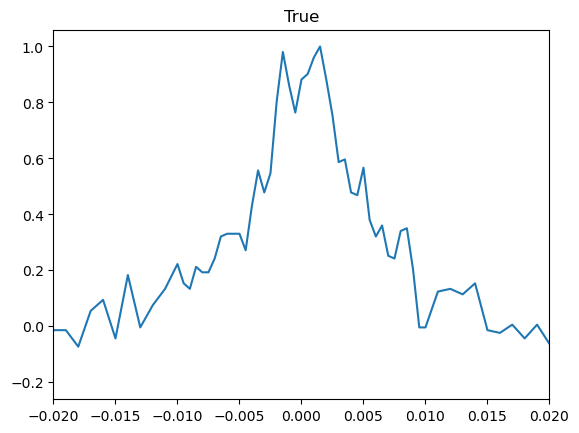

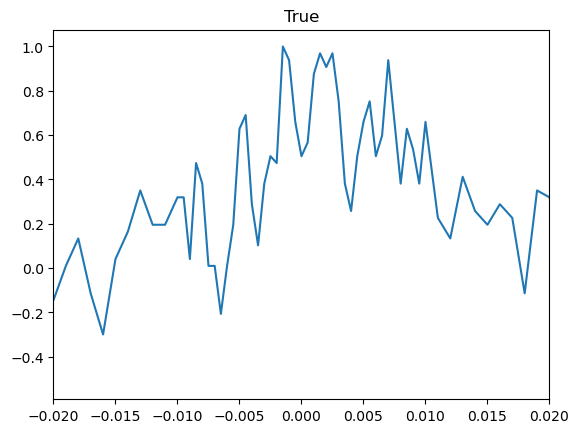

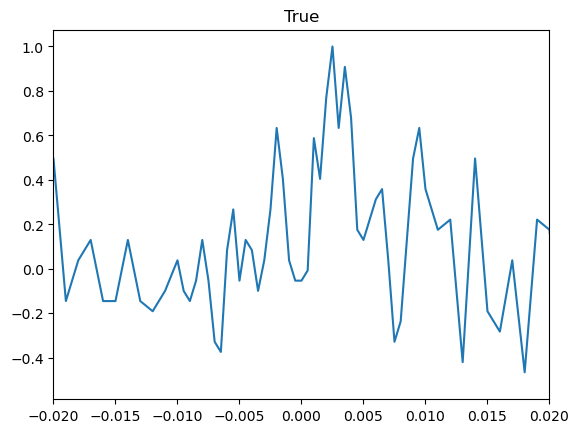

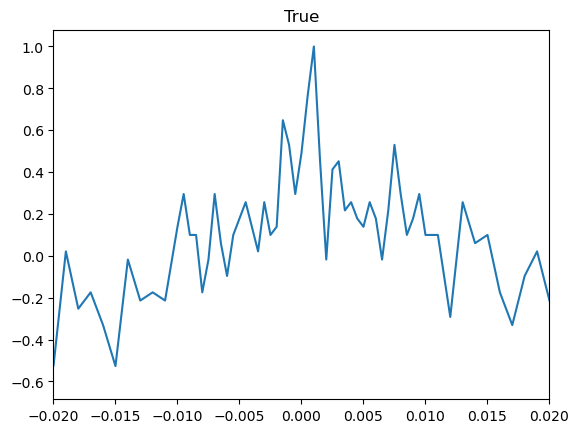

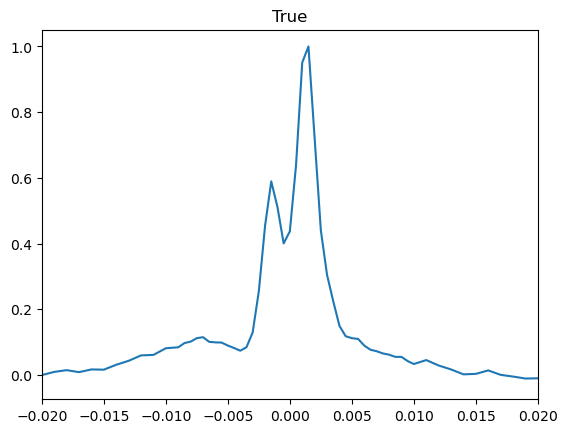

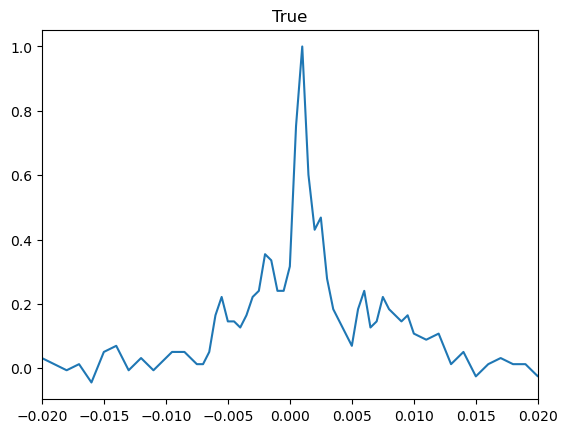

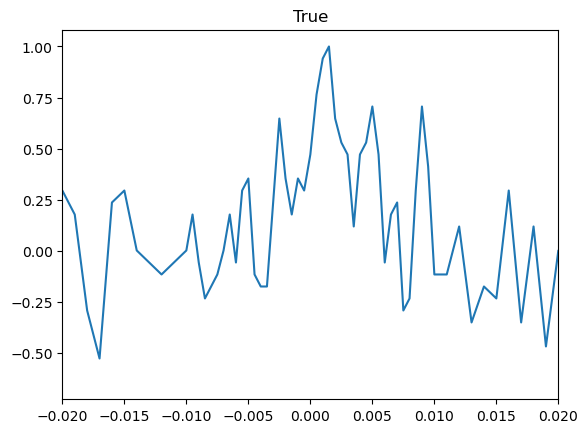

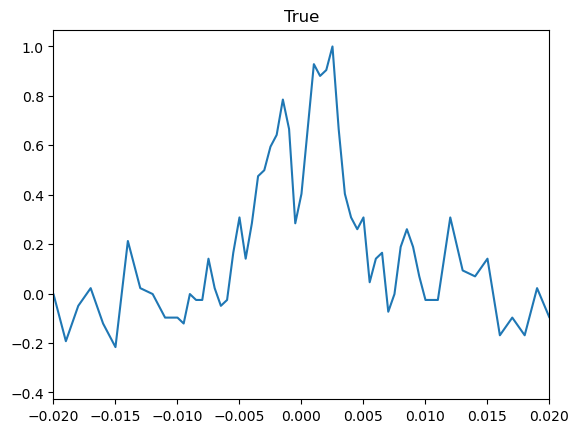

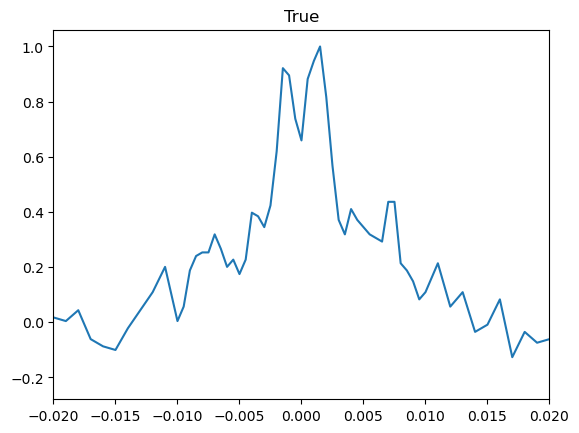

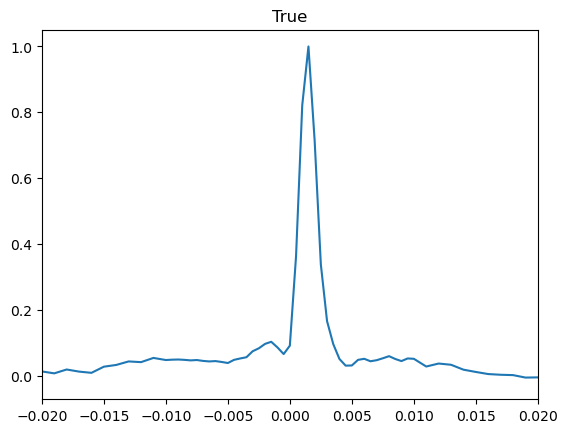

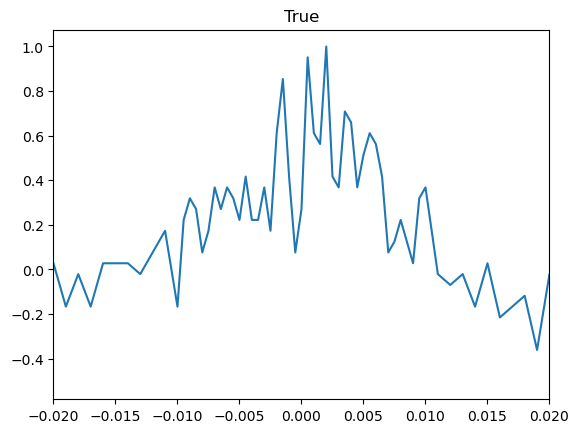

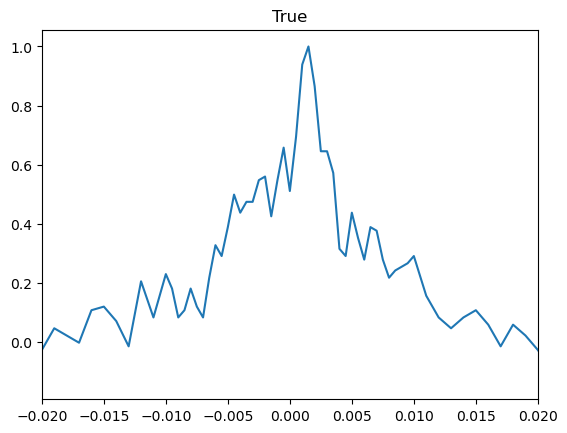

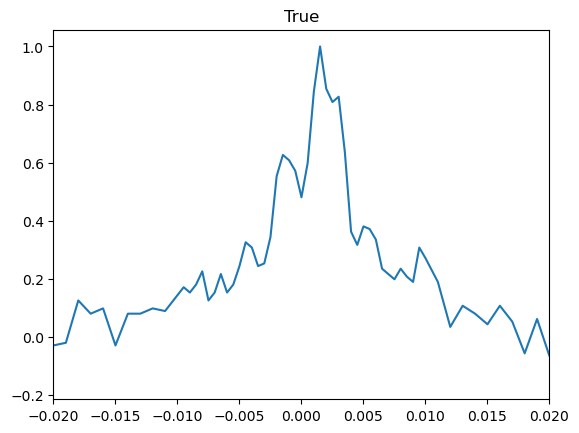

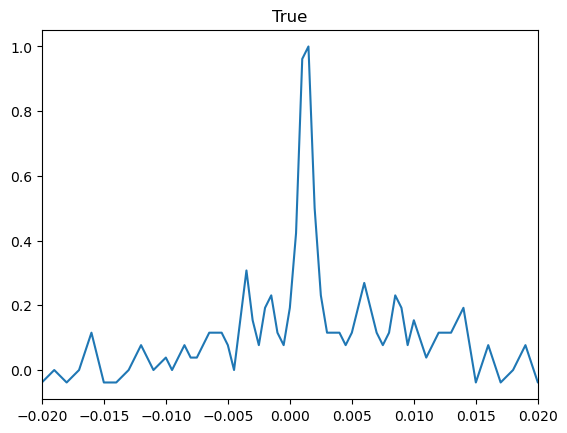

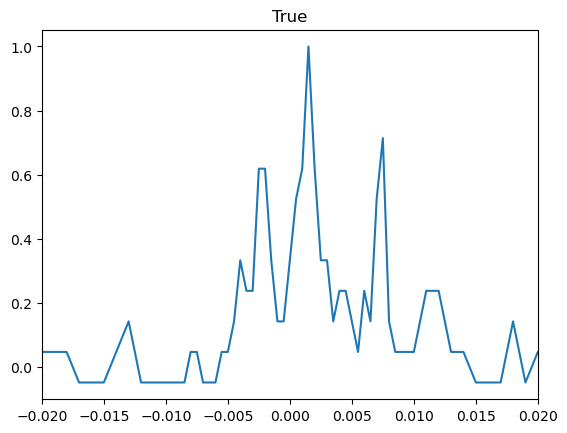

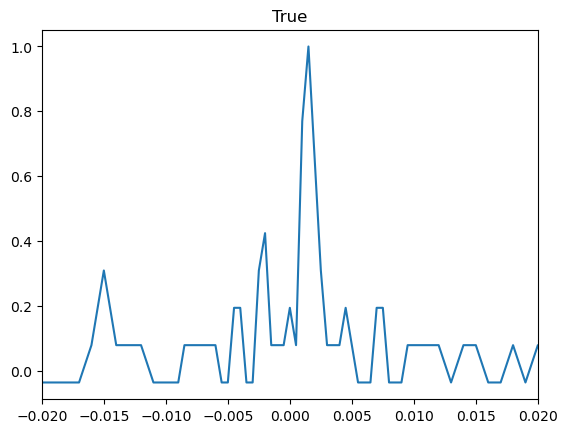

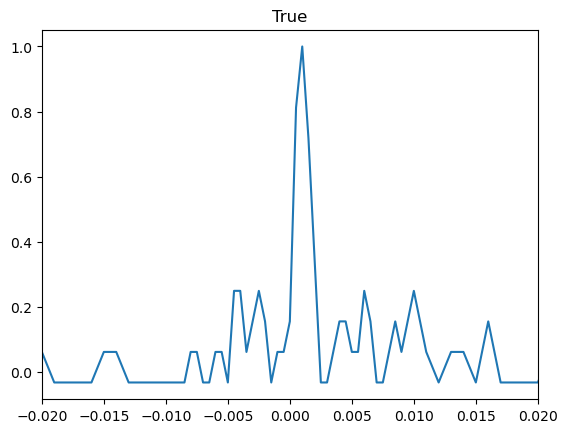

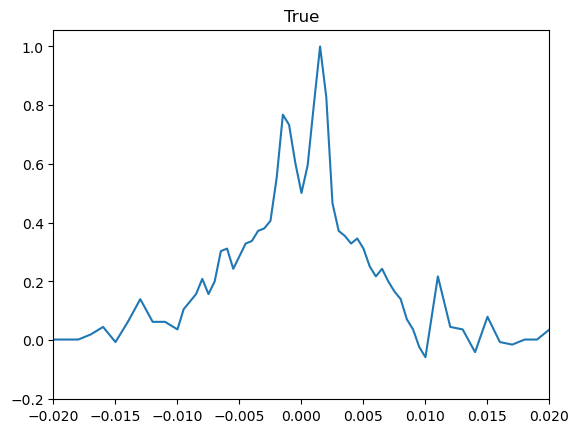

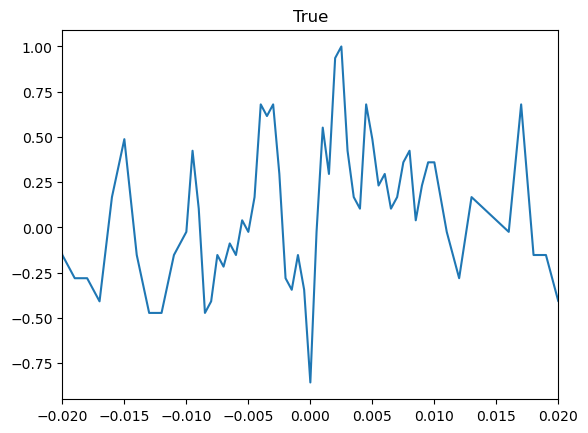

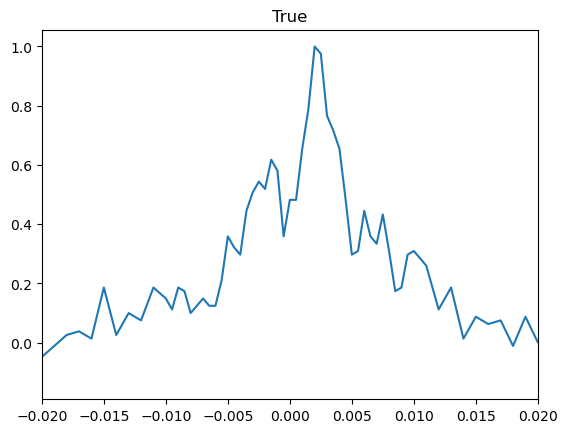

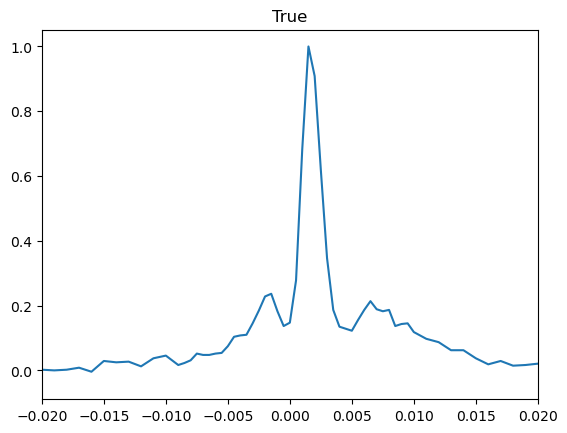

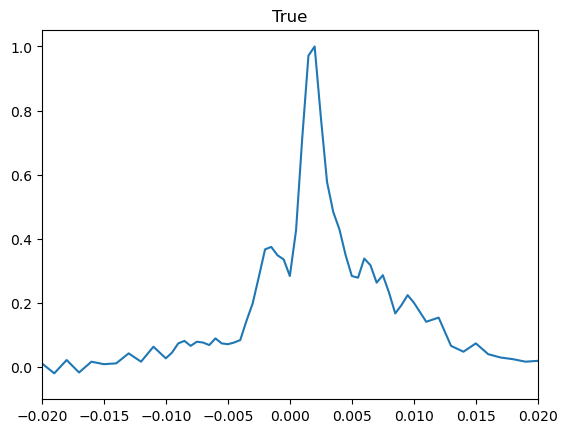

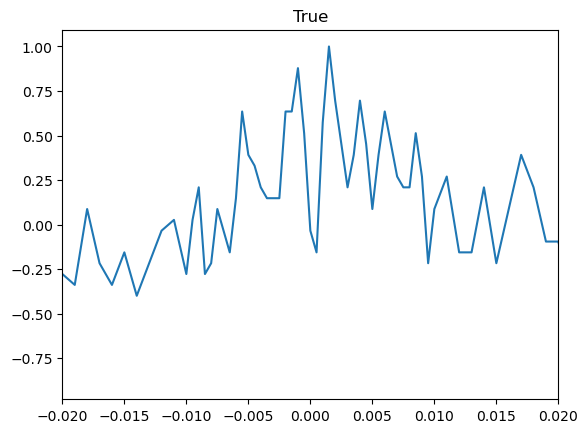

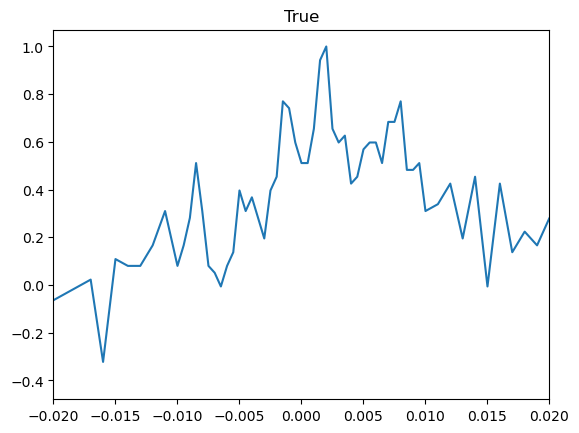

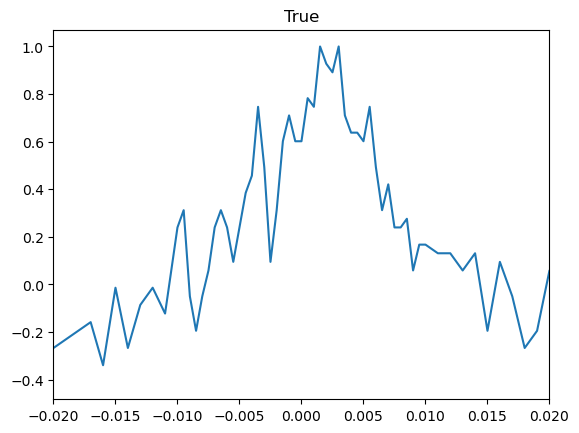

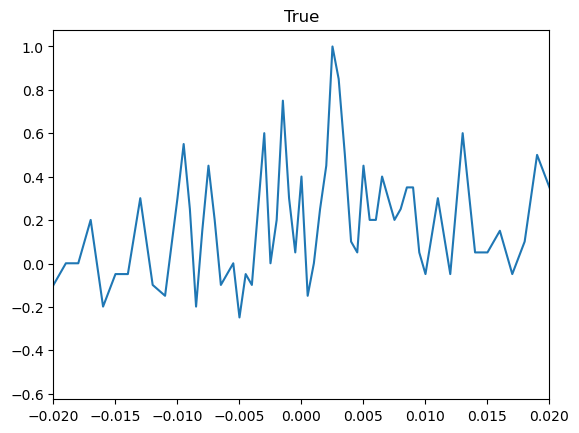

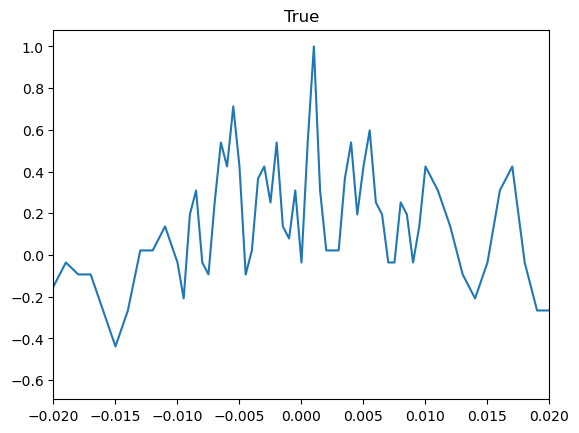

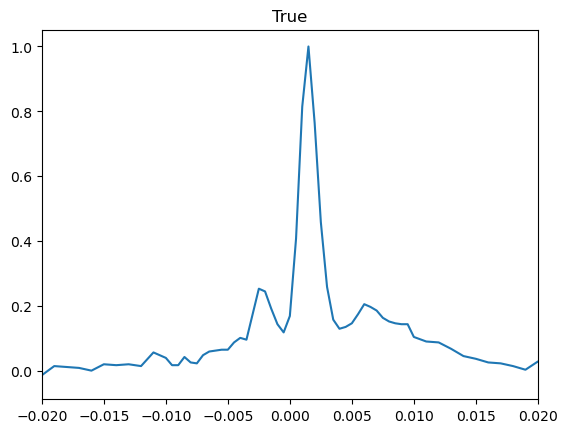

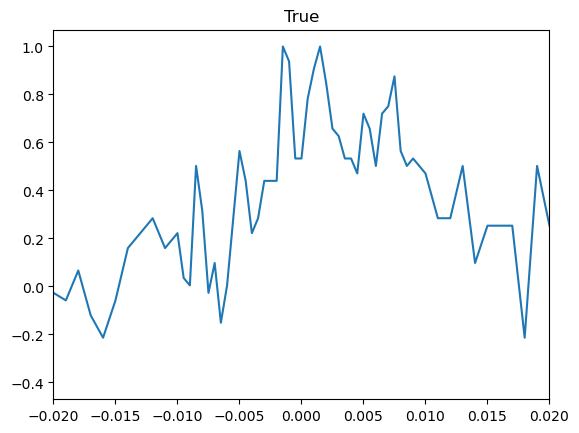

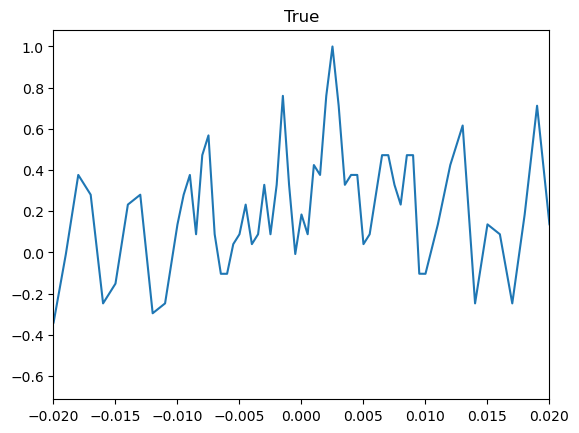

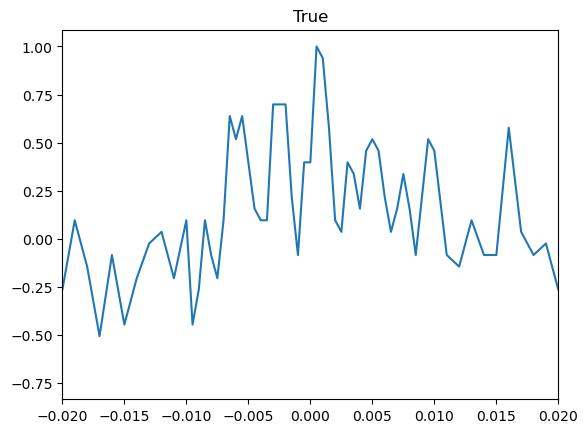

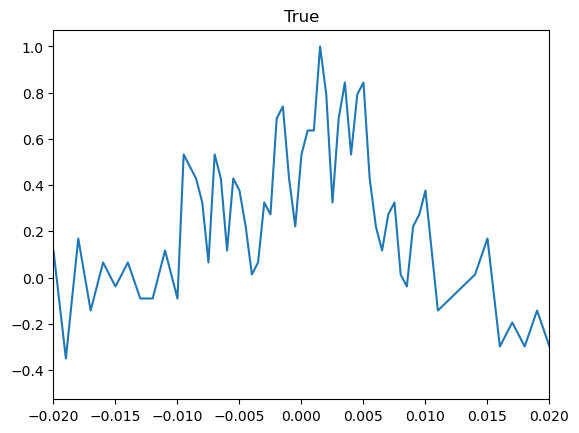

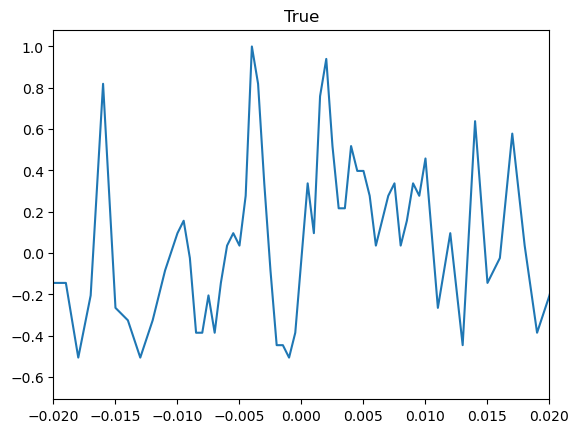

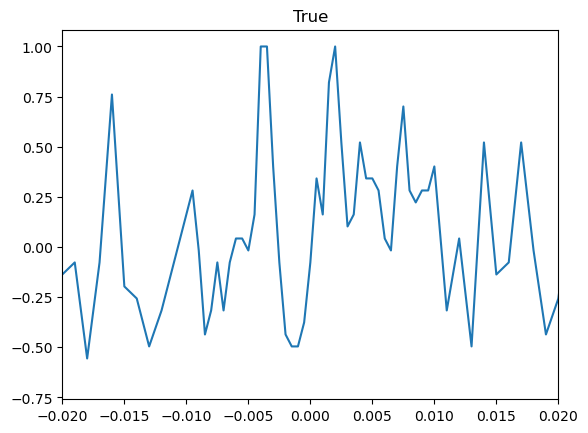

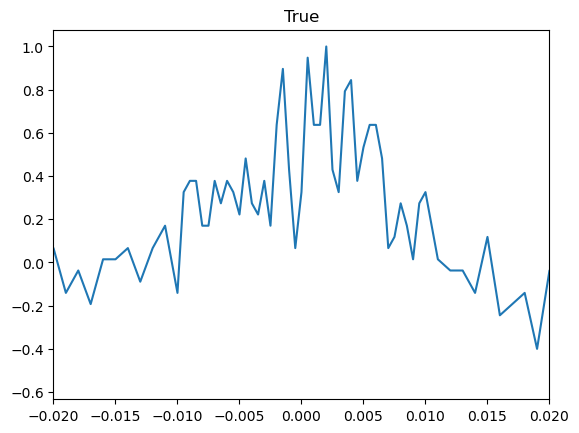

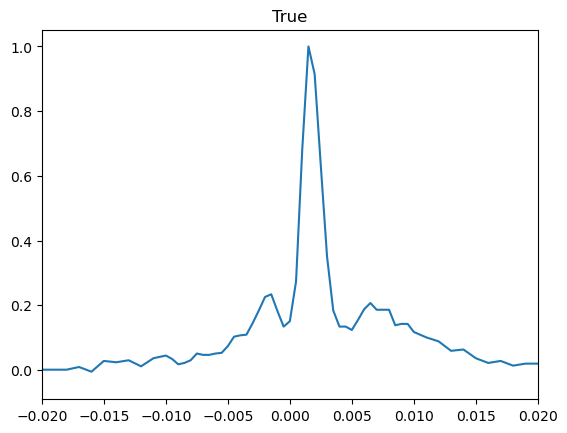

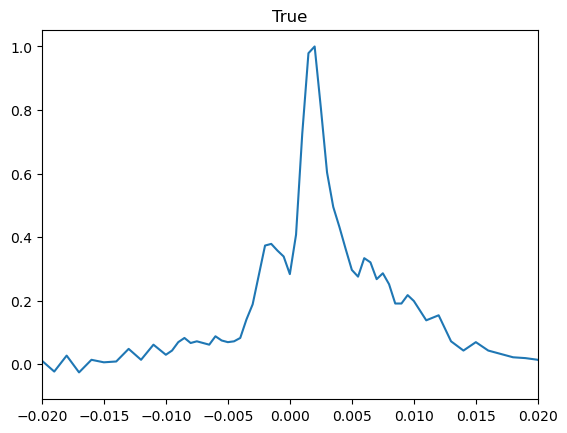

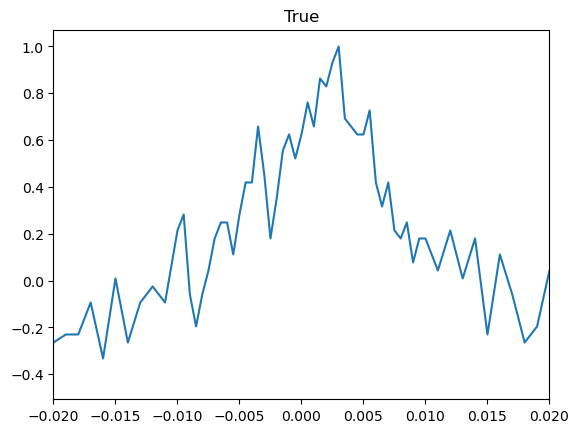

In [161]:
minus_min = []
for i in indices['ON parasol']:
    for j in indices['ON A1']:
        # if i >= j:
        #     continue
        overlap = overlaps[i, j]
        if overlap < 2:
            # print(overlap)
            double_peak_measure = detect_double_peak(cch_1ms[i, j]/np.max(cch_1ms[i, j]), delays)
            minus_min.append(double_peak_measure)
            if not double_peak_measure:
                continue
            plt.figure()
            plt.plot(delays, cch_1ms[i, j]/np.max(cch_1ms[i, j]))
            plt.xlim(-0.02, 0.02)
            plt.title(f"{double_peak_measure}")

In [57]:
onparasol_indices

[]